# PROJECT FOR ALY6020-Predictive Analytics
Analysis of Women's E-Commerce Clothing Reviews
- Link to the dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

 

GROUP MEMBERS:
- Ashlesha Kshirsagar
- Shruti Avinash Pawar


Week 2- EDA
Week 3- NLP, GLM
Week 4- KNN, RF, GB

 

In [1]:
# Importing libraries as required 
import pandas as pd
import numpy as np
import scipy
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore') 

from IPython.display import Image

%matplotlib inline



In [2]:
# Importing Dataframe
url = "https://raw.githubusercontent.com/ashlesha10/Women-s-E-Commerce-Clothing-Reviews/master/Data/Womens%20Clothing%20E-Commerce%20Reviews.csv" # Make sure the url is the raw version of the file on GitHub
df=pd.read_csv(url,index_col=0)
print(df.shape)
df.head()

(23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Cleaning, EDA and Visualization

In [3]:
#Checking for null values in the entire data
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [4]:
#Removing the nul values and storing the dataframe into new dataframe named new_data.
df1=df.dropna(axis=0, how='any')
print(df1.ndim)
print(df1.shape)
df1.head()

2
(19662, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


### NLP

In [5]:
df1.groupby(['Rating','Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    684
        1                      7
2       0                   1280
        1                     80
3       0                   1444
        1                   1020
4       0                    146
        1                   4143
5       0                     21
        1                  10837
Name: Recommended IND, dtype: int64

In [6]:
new_df = df1[['Title', 'Review Text', 'Recommended IND','Age','Rating']]
new_df.head()

,Title,Review Text,Recommended IND,Age,Rating
2,Some major design flaws,I had such high hopes for this dress and reall...,0,60,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,50,5
4,Flattering shirt,This shirt is very flattering to all due to th...,1,47,5
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",0,49,2
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,39,5


In [7]:
#Combining Title and Review text and making a review variable
new_df['Review'] = new_df['Title'] + ' ' + new_df['Review Text']
new_df = new_df.drop(labels=['Title','Review Text'] , axis=1)
new_df.head()

,Recommended IND,Age,Rating,Review
2,0,60,3,Some major design flaws I had such high hopes ...
3,1,50,5,"My favorite buy! I love, love, love this jumps..."
4,1,47,5,Flattering shirt This shirt is very flattering...
5,0,49,2,Not for the very petite I love tracy reese dre...
6,1,39,5,Cagrcoal shimmer fun I aded this in my basket ...


In [8]:
#Renaming Recomended IND column
new_df = new_df.rename(columns={"Recommended IND": "Recommended"})
print("My data's shape is:", new_df.shape)
new_df.head()

My data's shape is: (19662, 4)


,Recommended,Age,Rating,Review
2,0,60,3,Some major design flaws I had such high hopes ...
3,1,50,5,"My favorite buy! I love, love, love this jumps..."
4,1,47,5,Flattering shirt This shirt is very flattering...
5,0,49,2,Not for the very petite I love tracy reese dre...
6,1,39,5,Cagrcoal shimmer fun I aded this in my basket ...


In [9]:
#adding a column Review Length to the dataframe
new_df['Review_length'] = new_df['Review'].apply(len)
print(new_df.shape)
new_df.head()

(19662, 5)


,Recommended,Age,Rating,Review,Review_length
2,0,60,3,Some major design flaws I had such high hopes ...,524
3,1,50,5,"My favorite buy! I love, love, love this jumps...",141
4,1,47,5,Flattering shirt This shirt is very flattering...,209
5,0,49,2,Not for the very petite I love tracy reese dre...,512
6,1,39,5,Cagrcoal shimmer fun I aded this in my basket ...,517


In [10]:
new_df['Review_length'].describe()

count    19662.000000
mean       338.389838
std        144.610783
min         23.000000
25%        217.000000
50%        335.500000
75%        496.000000
max        557.000000
Name: Review_length, dtype: float64

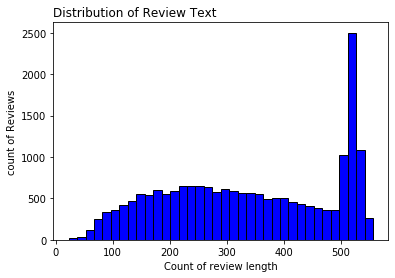

In [11]:
plt.hist(new_df['Review_length'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.title("Distribution of Review Text",loc ='left')
plt.xlabel('Count of review length')
plt.ylabel('count of Reviews')
plt.show()

In [12]:
def count_exclamation(strng):
    count = 0
    for char in strng:
        if char == '!':
            count += 1
    return count

In [13]:
new_df['Exc_Count'] = new_df['Review'].apply(count_exclamation)
new_df.head(5)

,Recommended,Age,Rating,Review,Review_length,Exc_Count
2,0,60,3,Some major design flaws I had such high hopes ...,524,1
3,1,50,5,"My favorite buy! I love, love, love this jumps...",141,3
4,1,47,5,Flattering shirt This shirt is very flattering...,209,3
5,0,49,2,Not for the very petite I love tracy reese dre...,512,0
6,1,39,5,Cagrcoal shimmer fun I aded this in my basket ...,517,0


In [14]:
new_df['Exc_Count'].describe()

count    19662.000000
mean         0.882921
std          1.412027
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         41.000000
Name: Exc_Count, dtype: float64

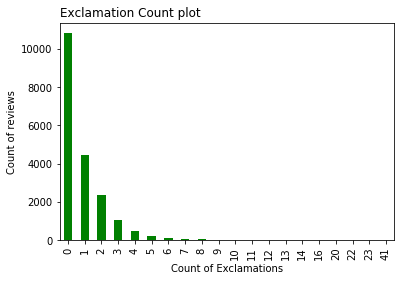

In [15]:
new_df['Exc_Count'].value_counts().sort_index().plot(kind='bar',color = "g")
plt.title("Exclamation Count plot",loc ='left')
plt.xlabel('Count of Exclamations')
plt.ylabel('Count of reviews')
plt.show()

In [16]:
new_df[new_df['Exc_Count']== 41].index

Int64Index([3301], dtype='int64')

In [17]:
new_df['Review'][3301]

'Beautiful and unique. Love this top, just received it today.\nit is a very artistic interpretation for a casual top.\nthe blue is gorgeous!\nthe unique style of the peplm and the details on the front set this apart!\nruns a little shorter, but i feel the length enhances it;s beauty, and is appropriate for the overall design.\nlove !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\nordered my usual size and it fits perfectly.'

In [18]:
new_df['Polarity'] = new_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
new_df.head(20)

,Recommended,Age,Rating,Review,Review_length,Exc_Count,Polarity
2,0,60,3,Some major design flaws I had such high hopes ...,524,1,0.073209
3,1,50,5,"My favorite buy! I love, love, love this jumps...",141,3,0.560714
4,1,47,5,Flattering shirt This shirt is very flattering...,209,3,0.512891
5,0,49,2,Not for the very petite I love tracy reese dre...,512,0,0.181111
6,1,39,5,Cagrcoal shimmer fun I aded this in my basket ...,517,0,0.157500
7,1,39,4,"Shimmer, surprisingly goes with lots I ordered...",519,0,0.230342
8,1,24,5,Flattering I love this dress. i usually get an...,177,0,0.002500
9,1,34,5,"Such a fun dress! I'm 5""5' and 125 lbs. i orde...",378,1,0.201814
10,0,53,3,Dress looks like it's made of cheap material D...,381,2,-0.047435
12,1,53,5,Perfect!!! More and more i find myself reliant...,513,3,0.307143


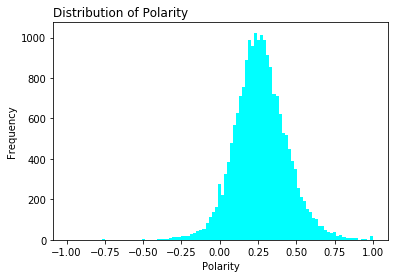

In [19]:
new_df['Polarity'].plot(kind='hist', bins=100,color = 'cyan')
plt.title("Distribution of Polarity",loc ='left')
plt.xlabel('Polarity')
plt.show()

In [20]:
prep = new_df.copy()

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [23]:
prep['Review'] = prep['Review'].apply(punctuation_removal)
prep['Review'].head()

2    Some major design flaws I had such high hopes ...
3    My favorite buy I love love love this jumpsuit...
4    Flattering shirt This shirt is very flattering...
5    Not for the very petite I love tracy reese dre...
6    Cagrcoal shimmer fun I aded this in my basket ...
Name: Review, dtype: object

In [24]:
def adj_collector(review_str):
    new_str=[]
    review_str = word_tokenize(review_str)
    tup_word = nltk.pos_tag(review_str)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':  #Verbs and Adjectives
            new_str.append(tup[0])  
    return ' '.join(new_str)

In [25]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\spawa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\spawa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spawa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
prep['Review'] = prep['Review'].apply(adj_collector)
prep['Review'].head(7)

2    major had such high wanted work i ordered smal...
3         favorite love love fabulous wear i get great
4    Flattering is flattering due adjustable is per...
5    petite love reese is petite am tall wear was i...
6    aded last see look i went am pale is gorgeous ...
7    goes ordered had try used top pair went is nic...
8    Flattering love get runs little ordered flatte...
Name: Review, dtype: object

Removing stopwords

In [27]:
print(stopwords.words('english')[::12])

['i', "you'd", 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', "don't", 'aren', 'haven', "shan't"]


In [28]:
stop = stopwords.words('english')
stop.append("i'm")

In [29]:
stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
print(stop_words[::12])

['i', 'youd', 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', 'dont', 'aren', 'haven', 'shant']


In [30]:
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

In [31]:
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words and word.lower() not in clothes_list ]

In [32]:
prep['Review'] = prep['Review'].apply(stopwords_removal)
prep['Review'].head()

2    [major, high, wanted, work, ordered, small, us...
3         [favorite, love, love, fabulous, get, great]
4    [flattering, flattering, due, adjustable, perf...
5    [petite, love, reese, petite, tall, long, full...
6    [aded, last, see, look, went, pale, gorgeous, ...
Name: Review, dtype: object

In [33]:
print(prep['Review'][267])

['nice', 'short', 'tall', 'iamp39d', 'say', 'fits', 'true', 'short', 'iamp39m', 'tall', 'wish', 'came']


Removing all numbers (weight, size etc.

In [34]:
def drop_numbers(nos):
    rem_nos = []
    for i in nos:
        if not re.search('\d', i):
            rem_nos.append(i)
    return ' '.join(rem_nos)

In [35]:
prep['Review'] = prep['Review'].apply(drop_numbers)
prep['Review'].head()

2    major high wanted work ordered small usual fou...
3                favorite love love fabulous get great
4    flattering flattering due adjustable perfect p...
5    petite love reese petite tall long full overwh...
6    aded last see look went pale gorgeous turns ma...
Name: Review, dtype: object

In [36]:
print(prep['Review'][267])

nice short tall say fits true short tall wish came


Stemming

In [37]:
porter = PorterStemmer()

In [38]:
prep['Review'] = prep['Review'].apply(lambda x: x.split())
prep['Review'].head()

2    [major, high, wanted, work, ordered, small, us...
3         [favorite, love, love, fabulous, get, great]
4    [flattering, flattering, due, adjustable, perf...
5    [petite, love, reese, petite, tall, long, full...
6    [aded, last, see, look, went, pale, gorgeous, ...
Name: Review, dtype: object

In [39]:
def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = porter.stem(word)
        text_list_new.append(word) 
    return text_list_new

In [40]:
prep['Review'] = prep['Review'].apply(stem_update)
prep['Review'].head()

2    [major, high, want, work, order, small, usual,...
3             [favorit, love, love, fabul, get, great]
4    [flatter, flatter, due, adjust, perfect, pair,...
5    [petit, love, rees, petit, tall, long, full, o...
6    [ade, last, see, look, went, pale, gorgeou, tu...
Name: Review, dtype: object

In [41]:
prep['Review'] = prep['Review'].apply(lambda x: ' '.join(x))
prep['Review'].head()

2    major high want work order small usual found s...
3                    favorit love love fabul get great
4     flatter flatter due adjust perfect pair cardigan
5    petit love rees petit tall long full overwhelm...
6    ade last see look went pale gorgeou turn mathc...
Name: Review, dtype: object

In [42]:
print(prep['Review'][2293])

flatter purchas return expect fit said lb got get disappoint soft purchas regular fit look terribl say tall thin ye short petit


Wordcloud

In [43]:
pos_df = prep[prep.Recommended== 1]
neg_df = prep[prep.Recommended== 0]
pos_df.head(10)

,Recommended,Age,Rating,Review,Review_length,Exc_Count,Polarity
3,1,50,5,favorit love love fabul get great,141,3,0.560714
4,1,47,5,flatter flatter due adjust perfect pair cardigan,209,3,0.512891
6,1,39,5,ade last see look went pale gorgeou turn mathc...,517,0,0.157500
7,1,39,4,goe order tri use pair went nice went flare et...,519,0,0.230342
8,1,24,5,flatter love get run littl order flatter femin...,177,0,0.002500
9,1,34,5,order make sure long xs busti fit snug tight l...,378,1,0.201814
12,1,53,5,find written savvi right reveiwsi tri made lin...,513,3,0.307143
13,1,44,5,big bought go line xs fit flowi say run big ni...,383,0,0.168125
14,1,50,3,nice graze conserv relat small small run small...,536,0,-0.036667
15,1,47,4,took want fit tell put straight small size tel...,496,1,0.205988


In [44]:
pos_words =[]
neg_words = []

for review in pos_df.Review:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)


for review in neg_df.Review:
    neg_words.append(review)
neg_words = ' '.join(neg_words)



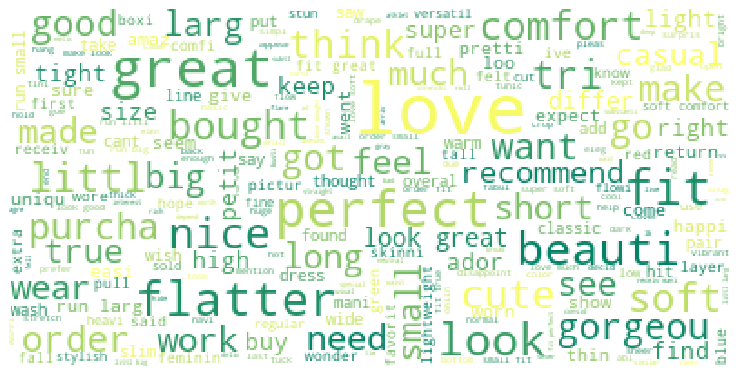

In [45]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

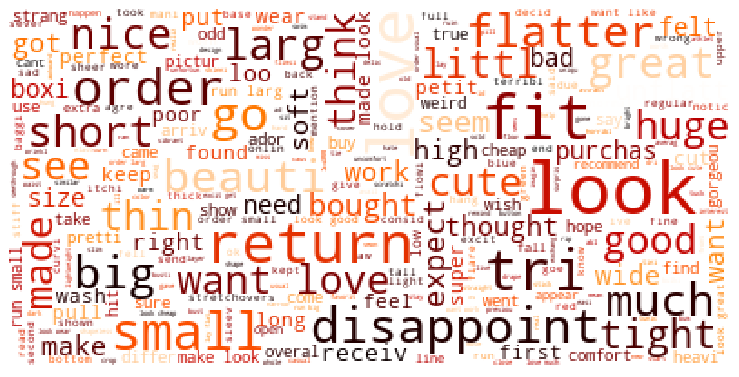

In [46]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Vectorizing - Bag of Words

In [47]:
def vectorizing_process(sentence_str):
    return [word for word in sentence_str.split()]

In [48]:
bow_transformer = CountVectorizer(vectorizing_process)

In [49]:
bow_transformer.fit(prep['Review'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8',
                input=<function vectorizing_process at 0x00000266BE227048>,
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [50]:
print(prep['Review'].iloc[6])

flatter love get run littl order flatter feminin usual


In [51]:
example = bow_transformer.transform([prep['Review'].iloc[6]])
print(example)

  (0, 2148)	1
  (0, 2242)	2
  (0, 2492)	1
  (0, 3420)	1
  (0, 3506)	1
  (0, 4209)	1
  (0, 5097)	1
  (0, 6812)	1


In [52]:
Reviews = bow_transformer.transform(prep['Review'])
Reviews

<19662x7276 sparse matrix of type '<class 'numpy.int64'>'
	with 237857 stored elements in Compressed Sparse Row format>

In [53]:
print('Shape of Sparse Matrix', Reviews.shape)
print('Amount of Non-Zero occurences:', Reviews.nnz)

Shape of Sparse Matrix (19662, 7276)
Amount of Non-Zero occurences: 237857


Term Frequency–Inverse Document Frequency

In [54]:
tfidf_transformer = TfidfTransformer().fit(Reviews)

tfidf_example = tfidf_transformer.transform(example)
print (tfidf_example)

  (0, 6812)	0.38715702321289835
  (0, 5097)	0.28876414175053866
  (0, 4209)	0.2562478579058955
  (0, 3506)	0.18640763255159604
  (0, 3420)	0.26875472512076126
  (0, 2492)	0.30503570134358937
  (0, 2242)	0.5339366121269553
  (0, 2148)	0.46470394072207855


In [55]:
[i for i in bow_transformer.vocabulary_.items() if i[1]==2226]

[('flamenco', 2226)]

In [56]:
[i for i in bow_transformer.vocabulary_.items()][6:60:10]

[('usual', 6812),
 ('tight', 6382),
 ('flatter', 2242),
 ('overwhelm', 4301),
 ('pale', 4322),
 ('said', 5132)]

In [57]:
msg_tfidf = tfidf_transformer.transform(Reviews)
msg_tfidf.shape

(19662, 7276)

In [58]:
print(msg_tfidf[:1])

  (0, 7272)	0.21471248032123674
  (0, 7158)	0.12710403438351436
  (0, 6929)	0.12017356219848803
  (0, 6812)	0.15132348131106407
  (0, 6382)	0.14062308848813138
  (0, 5600)	0.2978653215468642
  (0, 5289)	0.18844097401824506
  (0, 4942)	0.24443010814357377
  (0, 4437)	0.13984936774578804
  (0, 4259)	0.1585652642096957
  (0, 4209)	0.1001565659716828
  (0, 4137)	0.20923107084158285
  (0, 3943)	0.30396331781030056
  (0, 3583)	0.5250335216558651
  (0, 2933)	0.3111490185969125
  (0, 2768)	0.1460467597438324
  (0, 2363)	0.15055240254904467
  (0, 2196)	0.08515020472060218
  (0, 1153)	0.1062615432086087
  (0, 984)	0.19197041555126027
  (0, 698)	0.18406569756771646


Merging Sparse matrix with other features

In [59]:
msg_tfidf = msg_tfidf.toarray()
msg_tfidf = pd.DataFrame(msg_tfidf)
print(msg_tfidf.shape)
msg_tfidf.head()

(19662, 7276)


,0,1,2,3,4,5,6,7,8,9,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214712,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [60]:
Thedata = pd.merge(prep.drop(columns='Review'),msg_tfidf, 
                  left_index=True, right_index=True )
Thedata.head()

,Recommended,Age,Rating,Review_length,Exc_Count,Polarity,0,1,2,3,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
2,0,60,3,524,1,0.073209,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,50,5,141,3,0.560714,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,47,5,209,3,0.512891,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,49,2,512,0,0.181111,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,39,5,517,0,0.157500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


splitting the data

In [61]:
X = Thedata.drop('Recommended', axis=1)
Y = Thedata.Recommended

X.head()


,Age,Rating,Review_length,Exc_Count,Polarity,0,1,2,3,4,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
2,60,3,524,1,0.073209,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50,5,141,3,0.560714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47,5,209,3,0.512891,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,49,2,512,0,0.181111,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,39,5,517,0,0.157500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X.shape

(16462, 7281)

In [63]:
X.describe()

,Age,Rating,Review_length,Exc_Count,Polarity,0,1,2,3,4,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
count,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,...,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000
mean,43.353116,4.185822,338.276030,0.876503,0.266007,0.000024,0.000030,0.000024,0.000021,0.000086,...,0.000050,0.000025,0.000076,0.000072,0.000082,0.000021,0.002140,0.000288,0.000030,0.000121
std,12.241486,1.110793,144.664277,1.414427,0.172859,0.003141,0.003797,0.003100,0.002750,0.006477,...,0.004584,0.003209,0.004955,0.005367,0.006109,0.002728,0.027677,0.010313,0.003801,0.007060
min,18.000000,1.000000,23.000000,0.000000,-0.987500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,4.000000,217.000000,0.000000,0.158333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,5.000000,335.000000,0.000000,0.260917,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,5.000000,496.000000,1.000000,0.370346,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99.000000,5.000000,557.000000,41.000000,1.000000,0.402950,0.487127,0.397742,0.352831,0.599438,...,0.450050,0.411746,0.382198,0.400073,0.496882,0.350035,0.629009,0.484782,0.487703,0.526879


In [64]:
X_train, X_test, Y_train, Y_test = split(X,Y, test_size=0.3, stratify=Y, random_state=111)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11523, 7281), (4939, 7281), (11523,), (4939,))

In [65]:
Y_train.value_counts(normalize=True)

1    0.818624
0    0.181376
Name: Recommended, dtype: float64

In [66]:
Y_test.value_counts(normalize=True)

1    0.818587
0    0.181413
Name: Recommended, dtype: float64

### Random Forest Model

In [67]:
rf_model2 = RandomForestClassifier(n_estimators=500, max_depth=5, 
                                  class_weight='balanced', random_state=42,criterion='gini', bootstrap=True)
rf_model2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [68]:
test_predictions2 = rf_model2.predict(X_test)

print(confusion_matrix(Y_test, test_predictions2 ))
print(classification_report(Y_test, test_predictions2 ))

[[ 840   56]
 [ 279 3764]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       896
           1       0.99      0.93      0.96      4043

    accuracy                           0.93      4939
   macro avg       0.87      0.93      0.90      4939
weighted avg       0.94      0.93      0.93      4939



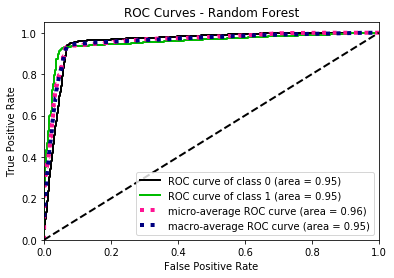

In [69]:
skplt.metrics.plot_roc(Y_test, rf_model2.predict_proba(X_test), 
                       title='ROC Curves - Random Forest') 


### Naive Bayes Multinomial

In [70]:
dat = pd.merge(prep.drop(columns=['Review','Polarity']),msg_tfidf, 
                  left_index=True, right_index=True )
dat.head()

,Recommended,Age,Rating,Review_length,Exc_Count,0,1,2,3,4,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
2,0,60,3,524,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,50,5,141,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,47,5,209,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,49,2,512,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,39,5,517,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X1 = dat.drop('Recommended', axis=1)
Y1 = dat.Recommended

X1.head()

,Age,Rating,Review_length,Exc_Count,0,1,2,3,4,5,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
2,60,3,524,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50,5,141,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47,5,209,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,49,2,512,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,39,5,517,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
X_train1, X_test1, Y_train1, Y_test1 = split(X1,Y1, test_size=0.3, stratify=Y1, random_state=111)
X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape

((11523, 7280), (4939, 7280), (11523,), (4939,))

In [74]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train1, Y_train1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [75]:
pred=nb.predict(X_test1)

In [76]:
print(confusion_matrix(Y_test1, pred))
print(classification_report(Y_test1, pred))

[[  45  851]
 [  13 4030]]
              precision    recall  f1-score   support

           0       0.78      0.05      0.09       896
           1       0.83      1.00      0.90      4043

    accuracy                           0.83      4939
   macro avg       0.80      0.52      0.50      4939
weighted avg       0.82      0.83      0.76      4939

